# WDSR

In [1]:
import os
import matplotlib.pyplot as plt

from data import Thermal
from model.wdsr import wdsr_b
from train import WdsrTrainer

%matplotlib inline

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# Number of residual blocks
depth = 32

# Super-resolution factor
scale = 4

# Downgrade operator
downgrade = 'bicubic'

In [9]:
# Location of model weights (needed for demo)
weights_dir = f'weights/wdsr-b-{depth}-x{scale}'
weights_file = os.path.join(weights_dir, 'new_weights.h5')

os.makedirs(weights_dir, exist_ok=True)

## Datasets

You don't need to download the DIV2K dataset as the required parts are automatically downloaded by the `DIV2K` class. By default, DIV2K images are stored in folder `.div2k` in the project's root directory.

In [10]:
Thermal_train = Thermal(scale=scale, subset='train', downgrade=downgrade)
Thermal_valid = Thermal(scale=scale, subset='valid', downgrade=downgrade)

In [11]:
train_ds = Thermal_train.dataset(batch_size=16, random_transform=True)
valid_ds = Thermal_valid.dataset(batch_size=1, random_transform=False, repeat_count=1)

LR_Image Directory:
/mnt/d/data/Thermal_train_LR_bicubic/X4
HR_Image Directory:
/mnt/d/data/Thermal_train_HR
LR_Image Directory:
/mnt/d/data/Thermal_valid_LR_bicubic/X4
HR_Image Directory:
/mnt/d/data/Thermal_valid_HR


## Training

### Pre-trained models

If you want to skip training and directly run the demo below, download [weights-wdsr-b-32-x4.tar.gz](https://martin-krasser.de/sisr/weights-wdsr-b-32-x4.tar.gz) and extract the archive in the project's root directory. This will create a `weights/wdsr-b-32-x4` directory containing the weights of the pre-trained model.

In [12]:
trainer = WdsrTrainer(model=wdsr_b(scale=scale, num_res_blocks=depth), 
                      checkpoint_dir=f'.ckpt/new_wdsr-b-{depth}-x{scale}')

In [13]:
# Train WDSR B model for 300,000 steps and evaluate model
# every 1000 steps on the first 10 images of the DIV2K
# validation set. Save a checkpoint only if evaluation
# PSNR has improved.
trainer.train(train_ds,
              valid_ds.take(10),
              steps=100000, 
              evaluate_every=1000, 
              save_best_only=True)

1000/100000: loss = 4.354, PSNR = 39.306740 (133.13s)
2000/100000: loss = 1.146, PSNR = 40.622765 (105.70s)
3000/100000: loss = 1.015, PSNR = 41.180305 (105.02s)
4000/100000: loss = 0.962, PSNR = 41.131424 (105.53s)
5000/100000: loss = 0.934, PSNR = 41.057529 (105.83s)
6000/100000: loss = 0.916, PSNR = 41.113930 (104.68s)
7000/100000: loss = 0.901, PSNR = 41.775932 (105.53s)
8000/100000: loss = 0.876, PSNR = 41.827328 (105.69s)
9000/100000: loss = 0.874, PSNR = 41.864666 (105.14s)
10000/100000: loss = 0.860, PSNR = 41.987999 (105.52s)
11000/100000: loss = 0.848, PSNR = 42.091320 (106.19s)
12000/100000: loss = 0.841, PSNR = 42.109123 (105.44s)
13000/100000: loss = 0.839, PSNR = 42.179985 (105.73s)
14000/100000: loss = 112.067, PSNR = 39.243889 (107.17s)
15000/100000: loss = 1.240, PSNR = 39.902790 (105.95s)
16000/100000: loss = 1.101, PSNR = 40.307198 (106.47s)
17000/100000: loss = 1.028, PSNR = 40.434505 (106.56s)
18000/100000: loss = 1.007, PSNR = 40.800407 (107.18s)
19000/100000: los

In [8]:
# Train WDSR B model for 300,000 steps and evaluate model
# every 1000 steps on the first 10 images of the DIV2K
# validation set. Save a checkpoint only if evaluation
# PSNR has improved.
trainer.train(train_ds,
              valid_ds.take(10),
              steps=300000, 
              evaluate_every=1000, 
              save_best_only=True)

1000/300000: loss = 4.436, PSNR = 39.164165 (131.63s)
2000/300000: loss = 1.148, PSNR = 40.529625 (104.49s)
3000/300000: loss = 1.021, PSNR = 41.155655 (104.21s)
4000/300000: loss = 0.955, PSNR = 41.111706 (104.39s)
5000/300000: loss = 0.925, PSNR = 41.389965 (104.84s)
6000/300000: loss = 0.906, PSNR = 41.454948 (104.96s)
7000/300000: loss = 0.890, PSNR = 41.720722 (105.01s)
8000/300000: loss = 0.884, PSNR = 41.804501 (104.62s)
9000/300000: loss = 0.876, PSNR = 41.888329 (104.78s)
10000/300000: loss = 0.870, PSNR = 41.995995 (103.57s)
11000/300000: loss = 0.860, PSNR = 41.994904 (103.86s)
12000/300000: loss = 0.843, PSNR = 42.019493 (103.12s)
13000/300000: loss = 0.842, PSNR = 42.093018 (103.36s)
14000/300000: loss = 0.827, PSNR = 42.173824 (103.03s)
15000/300000: loss = 0.833, PSNR = 42.062183 (102.89s)
16000/300000: loss = 0.822, PSNR = 42.317272 (103.55s)
17000/300000: loss = 0.817, PSNR = 42.383312 (103.27s)
18000/300000: loss = 0.813, PSNR = 42.421196 (103.83s)
19000/300000: loss 

In [14]:
# Restore from checkpoint with highest PSNR
trainer.restore()

Restoring from .ckpt/new_wdsr-b-32-x4/ckpt-27
Model restored from checkpoint at step 97000.


In [15]:
# Evaluate model on full validation set
psnr = trainer.evaluate(valid_ds)
print(f'PSNR = {psnr.numpy():3f}')

PSNR = 39.409710


In [16]:
# Save weights to separate location (needed for demo)
trainer.model.save_weights(weights_file)

## Demo

In [17]:
model = wdsr_b(scale=scale, num_res_blocks=depth)
model.load_weights(weights_file)

In [18]:
from model import resolve_single
from utils import load_image, plot_sample
import cv2
import numpy as np
import tensorflow as tf
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
import cv2

def resolve_and_plot(lr_image_path, hr_image_path):
    lr = load_image(lr_image_path)
    lr = cv2.cvtColor(lr, cv2.COLOR_GRAY2BGR)
    hr = load_image(hr_image_path)
    sr = resolve_single(model, lr)
    #print(hr.shape)
    #print(sr.shape)    
    plot_sample(lr, sr, hr)
    mse = tf.keras.losses.MeanSquaredError()
    sr2 = cv2.cvtColor(np.float32(sr), cv2.COLOR_BGR2GRAY)
    ssim_e = ssim(sr2, hr, data_range=hr.max() - hr.min())
    print(ssim_e)
    #err = mse(hr, sr2).numpy()
    #print("The mean square error of the two images is:")
    #print(err)
    

0.9852943030408593


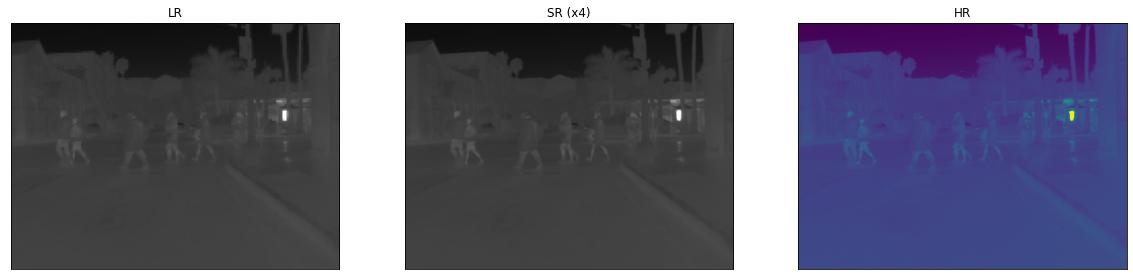

In [8]:
resolve_and_plot('demo/0004x4.png','demo/0004.png')

0.9678256301870908


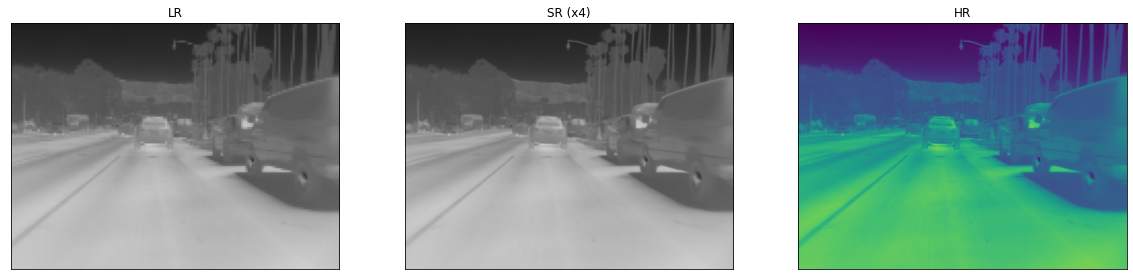

In [9]:
resolve_and_plot('demo/1064x4.png','demo/1064.png')

0.8973779253649764


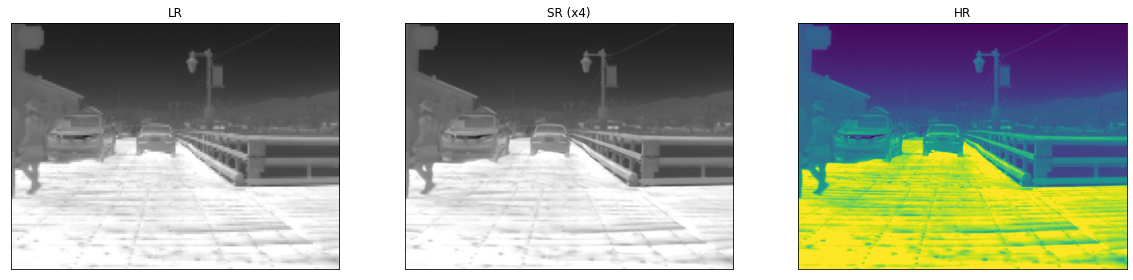

In [10]:
resolve_and_plot('demo/0303x4.png','demo/0303.png')

0.9852599350650338


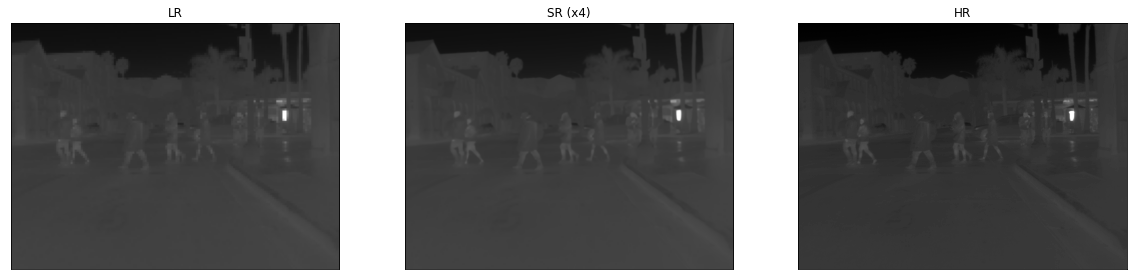

In [19]:
resolve_and_plot('demo/0004x4.png','demo/0004.png')

0.966549799570104


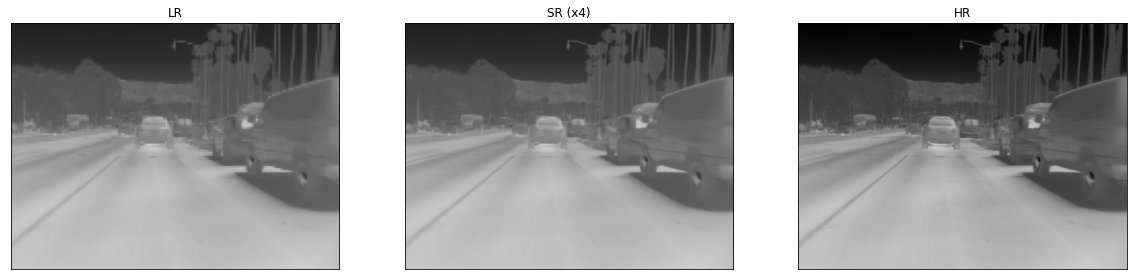

In [20]:
resolve_and_plot('demo/1064x4.png','demo/1064.png')

0.8963000117044606


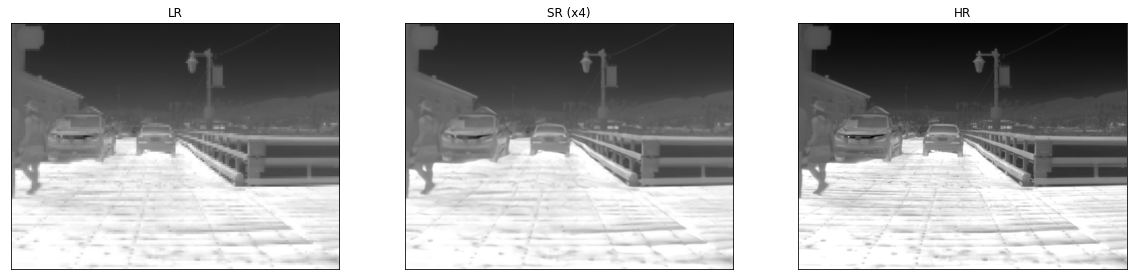

In [21]:
resolve_and_plot('demo/0303x4.png','demo/0303.png')